# Comparison of Classifiers
In this file, we will be splitting the scaled Heart Disease dataset into its Training and Test set.
After that, we will run multiple machine learning classifier algorithms.
We will compare the results of the classifiers to see the accuracy of each.

## Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn import svm # Support Vector Machine Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn import metrics

### Read CSV File

In [3]:
df = pd.read_csv('heart_dataset_scaled.csv')

# Display CSV Contents
df.head()

,ecg_encoded,bp_encoded,chol_encoded,hr_encoded,op_encoded,st_encoded,Sex_F,Sex_M,"age_binned_(25, 45]","age_binned_(45, 65]","age_binned_(65, 85]",chest_pain_from_heart_N,chest_pain_from_heart_Y,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.5,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
# Remove Validation Column (Heart Disease) from Other Attributes

cols = df.columns.to_list()
cols = cols[:-1]

X = df[cols]
y = df['HeartDisease']

# Display Contents
X.head()

,ecg_encoded,bp_encoded,chol_encoded,hr_encoded,op_encoded,st_encoded,Sex_F,Sex_M,"age_binned_(25, 45]","age_binned_(45, 65]","age_binned_(65, 85]",chest_pain_from_heart_N,chest_pain_from_heart_Y,ExerciseAngina_N,ExerciseAngina_Y
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.5,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Split Dataset into Testing & Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2)

In [31]:
X_test.shape

(184, 15)

# Support Vector Machine Classification
Support Vector Machine classifier uses a Radial Basis Function ('RBF') Kernel, which is popular.

In [6]:
# Create SVM Classifier w/ RBF Kernel
svm_clf = svm.SVC(kernel='rbf')

# Train the SVM Model
svm_clf.fit(X_train, y_train)

# Prediction for Test Set
svm_y_pred = svm_clf.predict(X_test)

In [19]:
# SVM Accuracy
svm_acc = metrics.accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_acc)

# SVM Precision
svm_pre = metrics.precision_score(y_test, svm_y_pred)
print("Precision:", svm_pre)

# SVM Recall
svm_rcl = metrics.recall_score(y_test, svm_y_pred)
print("Recall:", svm_rcl)

# SVM F1
svm_f1 = metrics.f1_score(y_test, svm_y_pred)
print("F1:", svm_f1)

# SVM Confusion Matrix
svm_cm = metrics.confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:\n", svm_cm)

Accuracy: 0.8478260869565217
Precision: 0.839622641509434
Recall: 0.89
F1: 0.8640776699029127
Confusion Matrix:
 [[67 17]
 [11 89]]


## Naive Bayes Classification

In [8]:
# Create a Gaussian Naive Bayes Classifier
nb_clf = GaussianNB()

# Train the Naive Bayes Model
nb_clf.fit(X_train,y_train)

#Prediction for Test Set
nb_y_pred = nb_clf.predict(X_test)

In [21]:
# NB Accuracy
nb_acc = metrics.accuracy_score(y_test, nb_y_pred)
print("Accuracy:", nb_acc)

# NB Precision
nb_pre = metrics.precision_score(y_test, nb_y_pred)
print("Precision:", nb_pre)

# NB Recall
nb_rcl = metrics.recall_score(y_test, nb_y_pred)
print("Recall:", nb_rcl)

# NB F1
nb_f1 = metrics.f1_score(y_test, nb_y_pred)
print("F1:", nb_f1)

# NB Confusion Matrix
nb_cm = metrics.confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", nb_cm)

Accuracy: 0.8586956521739131
Precision: 0.8936170212765957
Recall: 0.84
F1: 0.8659793814432989
Confusion Matrix:
 [[74 10]
 [16 84]]


## Random Forest Classification

In [10]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the Random Forest Model
rf_clf.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_clf.predict(X_test)

In [22]:
# Random Forest Accuracy
rf_acc = metrics.accuracy_score(y_test, rf_y_pred)
print("Accuracy:", rf_acc)

# Random Forest Precision
rf_pre = metrics.precision_score(y_test, rf_y_pred)
print("Precision:", rf_pre)

# Random Forest Recall
rf_rcl = metrics.recall_score(y_test, rf_y_pred)
print("Recall:", rf_rcl)

# Random Forest F1
rf_f1 = metrics.f1_score(y_test, rf_y_pred)
print("F1:", rf_f1)

# Random Forest Confusion Matrix
rf_cm = metrics.confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", rf_cm)

Accuracy: 0.8315217391304348
Precision: 0.8285714285714286
Recall: 0.87
F1: 0.848780487804878
Confusion Matrix:
 [[66 18]
 [13 87]]


## Decision Tree Classification

In [12]:
# Decision Tree
dt_clf = DecisionTreeClassifier()

# Train the Decision Tree Model
dt_clf.fit(X_train, y_train)

# Predictions
dt_y_pred = dt_clf.predict(X_test)

In [23]:
# Decision Tree Accuracy
dt_acc = metrics.accuracy_score(y_test, dt_y_pred)
print("Accuracy:", dt_acc)

# Decision Tree Precision
dt_pre = metrics.precision_score(y_test, dt_y_pred)
print("Precision:", dt_pre)

# Decision Tree Recall
dt_rcl = metrics.recall_score(y_test, dt_y_pred)
print("Recall:", dt_rcl)

# Decision Tree F1
dt_f1 = metrics.f1_score(y_test, dt_y_pred)
print("F1:", dt_f1)

# DT Confusion Matrix
dt_cm = metrics.confusion_matrix(y_test, dt_y_pred)
print("Confusion Matrix:\n", dt_cm)

Accuracy: 0.8260869565217391
Precision: 0.8333333333333334
Recall: 0.85
F1: 0.8415841584158417
Confusion Matrix:
 [[67 17]
 [15 85]]


# Gather Results Data

In [24]:
results_dict = {'Decision Tree': [dt_acc, dt_pre, dt_rcl, dt_f1],
               'Random Forest': [rf_acc, rf_pre, rf_rcl, rf_f1],
               'Support Vector Machine': [svm_acc, svm_pre, svm_rcl, svm_f1],
               'Naive Bayes': [nb_acc, nb_pre, nb_rcl, nb_f1]}

clf_index = ['Accuracy', 'Precision', 'Recall', 'F1']

results_df = pd.DataFrame(data=results_dict, index=clf_index)

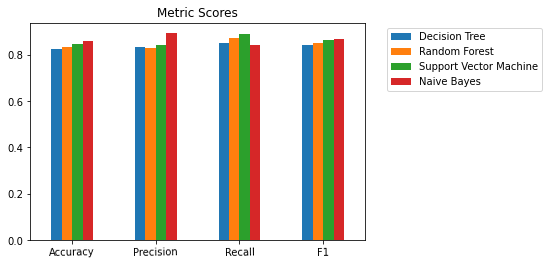

In [25]:
results_df.plot(kind='bar', title='Metric Scores',rot=1)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [26]:
print(dt_cm[0,0])

67
